<a href="https://colab.research.google.com/github/Sreeja1585/my-projects/blob/main/Classification_with_Logistic_Regression(Task4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve


In [2]:
# Load Breast Cancer Dataset from sklearn
data = load_breast_cancer()

# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape:", X.shape)
print("Target classes:", y.unique())


Shape: (569, 30)
Target classes: [0 1]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Precision: 0.9861111111111112
Recall: 0.9861111111111112
ROC-AUC Score: 0.9953703703703703


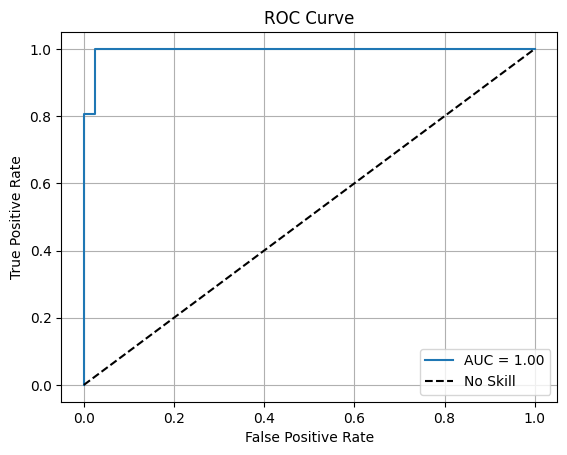

In [5]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


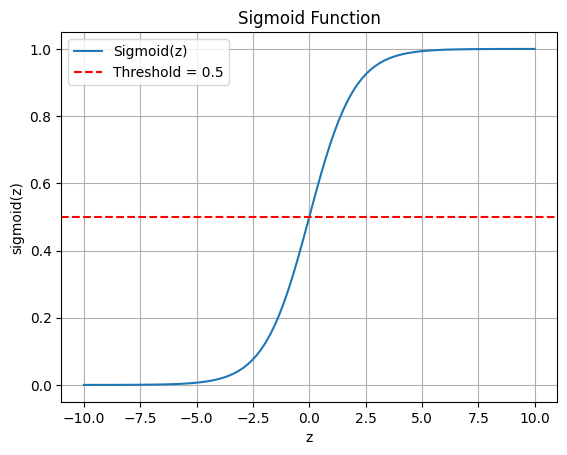

In [6]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid curve
z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals), label="Sigmoid(z)")
plt.axhline(0.5, color='red', linestyle='--', label="Threshold = 0.5")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.legend()
plt.show()


In [7]:
for threshold in [0.3, 0.5, 0.7]:
    y_pred_custom = (y_prob >= threshold).astype(int)
    print(f"\n--- Threshold: {threshold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
    print("Precision:", precision_score(y_test, y_pred_custom))
    print("Recall:", recall_score(y_test, y_pred_custom))


--- Threshold: 0.3 ---
Confusion Matrix:
 [[40  2]
 [ 0 72]]
Precision: 0.972972972972973
Recall: 1.0

--- Threshold: 0.5 ---
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Precision: 0.9861111111111112
Recall: 0.9861111111111112

--- Threshold: 0.7 ---
Confusion Matrix:
 [[41  1]
 [ 5 67]]
Precision: 0.9852941176470589
Recall: 0.9305555555555556
